# 3.1 Reading Seismograms
Seismograms of various formats (e.g. SAC, MiniSEED, GSE2, SEISAN, Q, etc.) can be imported into a Stream object using the read() function.

Streams are list-like objects which contain multiple Trace objects, i.e. gap-less continuous time series and related header/meta information.

Each Trace object has a attribute called data pointing to a NumPy ndarray of the actual time series and the attribute stats which contains all meta information in a dictionary-like Stats object. Both attributes starttime and endtime of the Stats object are UTCDateTime objects.

The following example demonstrates how a single GSE2-formatted seismogram file is read into a ObsPy Stream object. There exists only one Trace in the given seismogram:

In [1]:
from obspy import read

In [2]:
st = read('http://examples.obspy.org/RJOB_061005_072159.ehz.new')
print(st)

1 Trace(s) in Stream:
.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples


In [3]:
len(st)

1

In [4]:
tr = st[0]  # assign first and only trace to new variable
print(tr)

.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples


## 3.1 Accessing Meta Data
Seismogram meta data, data describing the actual waveform data, are accessed via the stats keyword on each Trace:

In [5]:
print(tr.stats)

         network: 
         station: RJOB
        location: 
         channel: Z
       starttime: 2005-10-06T07:21:59.850000Z
         endtime: 2005-10-06T07:24:59.845000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 36000
           calib: 0.0949
         _format: GSE2
            gse2: AttribDict({'auxid': 'RJOB', 'datatype': 'CM6', 'calper': 1.0, 'instype': '', 'hang': -1.0, 'vang': -1.0, 'lat': -999.0, 'lon': -999.0, 'coordsys': '', 'elev': -0.999, 'edepth': -0.999})


In [6]:
tr.stats.station

'RJOB'

In [7]:
tr.stats.gse2.datatype

'CM6'

## 3.2 Accessing Waveform Data
The actual waveform data may be retrieved via the data keyword on each Trace:

In [8]:
tr.data

array([-38,  12,  -4, ..., -14,  -3,  -9])

In [9]:
tr.data[0:3]

array([-38,  12,  -4])

In [10]:
len(tr)

36000

## 3.3 Data Preview
Stream objects offer a plot() method for fast preview of the waveform (requires the obspy.imaging module):

In [11]:
st.plot();

<Figure size 800x250 with 1 Axes>

## Source Code

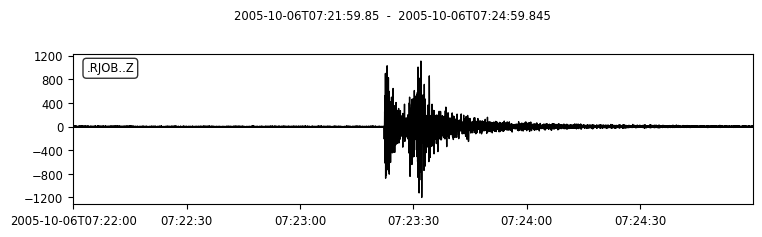

In [12]:
import obspy

st = obspy.read('https://examples.obspy.org/RJOB_061005_072159.ehz.new')
st.plot();